In [8]:
#Importing needed modules .
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras import layers ,models

In [15]:
#Reading csv file and getting 10 sample of that randomly .
path = "D:\\datasets\\Fake_job_posting\\fake_job_postings.csv"
file = pd.read_csv(path)
df = file.copy()
df.sample(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
14276,14277,Key Account Manager Switzerland,"CH, BS, Basel",Sales,NaN,NaN,Are you looking for a career that will challen...,NaN,NaN,0,1,1,Full-time,Associate,Bachelor's Degree,Education Management,Sales,0
2929,2930,Senior Software Developer(Java),"HK, ,",NaN,NaN,Joy Aether is a leading provider of mobile bus...,Joy Aether LimitedJoy Aether is a leading prov...,Requirements:3+ years working experience in Ja...,Benefits:Gain experience in a fast growing ind...,0,1,0,Full-time,NaN,Bachelor's Degree,Information Technology and Services,Information Technology,0
11724,11725,JAVA/J2EE developer,"BE, , Brussels",NaN,NaN,EUROPEAN DYNAMICS (#URL_c66532ffa1ce76ab447da6...,We currently have a vacancy for JAVA/J2EE dev...,Your skills:University degree with minimum 2 y...,Our offer: If you are seeking a career in an e...,0,1,0,Full-time,Associate,Bachelor's Degree,Computer Software,Information Technology,0
7766,7767,Music Editor,"GB, LND, London",Music,NaN,DICE gets fans the best tickets at face value ...,DICE is building an editorial team in London.Y...,You live in LondonA deep understanding of the ...,You'll be working with smart people who have a...,0,1,1,Part-time,Associate,High School or equivalent,Entertainment,NaN,0
11056,11057,Marketing & Communications Manager - Rippleshot,"US, IL, Chicago",Rippleshot,40000-60000,The story of the Great Chicago Fire of 1871 is...,JOB DESCRIPTIONRippleshot is looking for a Mar...,DESIRED EXPERIENCE2-5 years of marketing exper...,NaN,0,1,0,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Marketing,0
8544,8545,Luxury Automotive Brand: Digital Account Manager,"GB, LND, London",Customer Services,30000-35000,"Working in over 60 countries and 30 languages,...",The CompanyWorking in over 50 countries and 30...,Key Skills/Experience:Digital marketing experi...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Online Media,Sales,0
14375,14376,Software Engineer,"US, IL, Chicago",NaN,NaN,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Information Technology and Services,NaN,0
17435,17436,Service Advisor,"US, MA, Wilmington",Service,NaN,We are a family run business that has been in ...,Bill Dube Hyundai in Wilmington MA just outsid...,This is a great opportunity to join a busy and...,Great pay plan and benefits,0,1,0,Full-time,NaN,NaN,Automotive,Customer Service,0
17675,17676,"Account Sales Managers $80-$130,000/yr","US, NY, Poughkeepsie",NaN,NaN,We have aggressive growth plans in place for t...,We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,We Provide- Complete online training and offic...,0,1,0,Full-time,Associate,High School or equivalent,Financial Services,Business Development,1
2916,2917,Graduates: English Teacher Abroad (Conversatio...,"US, PA, Bloomsburg",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it :-)Love travel...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,Entry level,Bachelor's Degree,Education Management,Education,0


In [16]:
#Getting information from data frame .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [22]:
#There is one null row in description column , so lets find its index .
idx = 0
for note in df.description :
    if note is np.nan :
        break
    idx += 1

In [26]:
#Droping the null row from data frame .
df = df.drop(index=idx,axis=0)

In [27]:
#Getting information from data frame .
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17879 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17879 non-null  int64 
 1   title                17879 non-null  object
 2   location             17533 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17879 non-null  int64 
 10  has_company_logo     17879 non-null  int64 
 11  has_questions        17879 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [28]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [30]:
#Seperating features .
features = [Filter(text) for text in df.description.to_list()]

In [41]:
#Seperating labels .
labels = df.fraudulent.to_numpy().reshape(-1,1)

In [42]:
#Getting an instance of Tokenizer .
tokenizer = Tokenizer(oov_token = '<00U00>')

In [43]:
#Preparing data to feed the model .
tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=16)

In [80]:
Seperating features and labels to train and valid
idx = (int(input('Enter train size :'))*len(matrix))//100
xtr , ytr = matrix[:idx] , labels[:idx]
xts , yts = matrix[idx:] , labels[idx:]

Enter train size :65


In [87]:
print(f'There are {len(xtr)} texts for train and {len(xts)} texts for valid')

There are 11621 texts for train and 6258 texts for valid


In [84]:
#Defining and compiling a model .
model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,2,input_length=16),
                          layers.Flatten(),
                           layers.Dropout(0.1),
                          layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
#datas train .
history = model.fit(xtr,ytr,epochs = 25 , validation_data = (xts,yts))

Epoch 1/25
364/364 [==============================] - 2s 4ms/step - loss: 0.5284 - accuracy: 0.9341 - val_loss: 0.3642 - val_accuracy: 0.9390
Epoch 2/25
364/364 [==============================] - 1s 3ms/step - loss: 0.2105 - accuracy: 0.9607 - val_loss: 0.2087 - val_accuracy: 0.9394
Epoch 3/25
364/364 [==============================] - 1s 3ms/step - loss: 0.1329 - accuracy: 0.9626 - val_loss: 0.2034 - val_accuracy: 0.9394
Epoch 4/25
364/364 [==============================] - 1s 3ms/step - loss: 0.1191 - accuracy: 0.9632 - val_loss: 0.1973 - val_accuracy: 0.9396
Epoch 5/25
364/364 [==============================] - 1s 3ms/step - loss: 0.1093 - accuracy: 0.9645 - val_loss: 0.1898 - val_accuracy: 0.9426
Epoch 6/25
364/364 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9682 - val_loss: 0.1848 - val_accuracy: 0.9457
Epoch 7/25
364/364 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9710 - val_loss: 0.1825 - val_accuracy: 0.9463
Epoch 

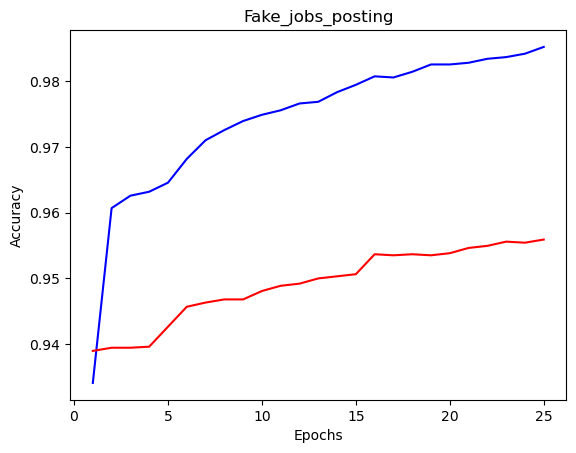

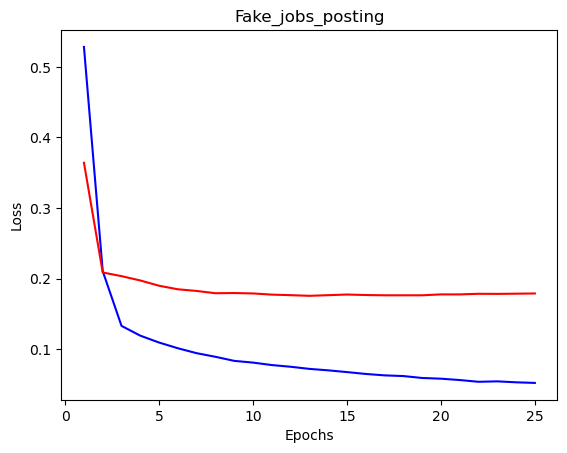

In [86]:
#Visualize models performance
epoch = range(1,26)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fake_jobs_posting')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fake_jobs_posting')
plt.show()